In [1]:
#Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from utiles import spike_reducer
#spike_recuder
#import umap
#import umap.plot
#from umap import UMAP
##Generar un archivo PKL
import pickle 
##Algoritmosde Clustering
import hdbscan
#from sknetwork.clustering import Louvain

from tqdm import tqdm

In [2]:
# C A R G A   E X P E R I M E N T O
import pickle

name = "E:\\MEA_data\\20230622\\datamanager\\Rebanada02\\L6_SPK.pckl"
charge_pckl = open(name,'rb') 
experiment_pckl = pickle.load(charge_pckl)
charge_pckl.close()

In [3]:
# . . : : U M A P : : . .
keys = list(experiment_pckl.keys())
for i in tqdm(range(0, len(keys))):
    e = keys[i]
    reduced_spikes = spike_reducer(experiment_pckl[e]['segments'], v_neighbors = 35, random_state = 18)
    spike_embedding = reduced_spikes.embedding_
    clusterer = hdbscan.HDBSCAN(min_cluster_size=15)
    #clusterer = hdbscan.HDBSCAN(min_cluster_size=30)
    clusterer.fit(spike_embedding)
    experiment_pckl[e]['clusters'] = clusterer.labels_
    experiment_pckl[e]['umap'] = spike_embedding

#for i in tqdm(range(0, len(spike_embedding))):
#    experiment_pckl[e]['UMAP'] = spike_embedding[i]

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:17<00:00, 17.30s/it]


In [4]:
experiment_pckl.keys()

dict_keys(['L6'])

In [5]:
experiment_pckl['L6']['clusters']

array([4, 4, 4, ..., 0, 0, 0], dtype=int64)

Número de spikes seleccionados: 0
Cluster encontrados: [0 1 2 3 4]
Spikes detected: 3988


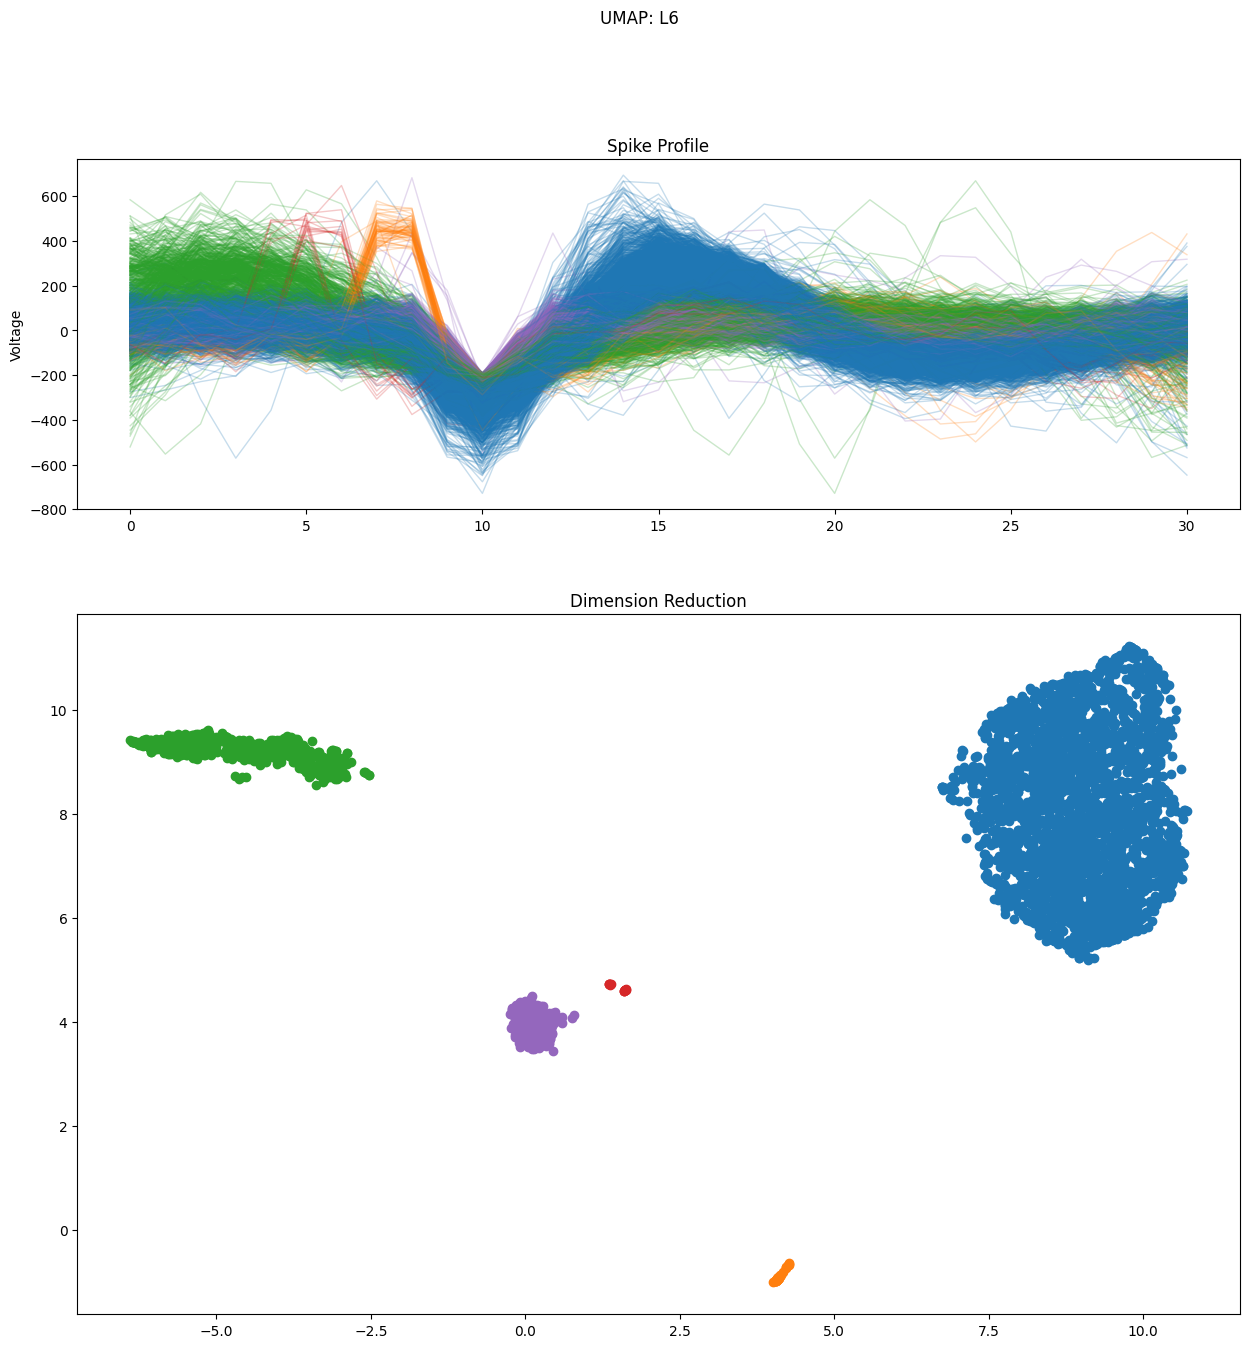

In [6]:
# mini GUI 
# gamma 0.85 0.9 para 
e = 'L6'
#mode = 'Select'
mode = 'All'
cluster_list = [0]
#cluster_list = [0]

#name = './files/CTR20211101s01B_SPK.pckl'
#name = "/media/yeshua/zeiler_v2/MEA_data/20230622/datamanager/Rebanada02/L6_v2.pckl"

colores = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

fig, axs = plt.subplots(2, figsize=(15,15), gridspec_kw={'height_ratios': [1, 2]})
fig.suptitle("UMAP: {}".format(e))

axs[0].title.set_text('Spike Profile')
axs[0].set(ylabel='Voltage')

axs[1].title.set_text('Dimension Reduction')

conde_s = 0
list_tmp = []
list_ts = []
template = {}
clusters_seg = {}
#for i in range(0, len(cluster_list))

for j in range(0, len(experiment_pckl[e]['segments'])):
    
    
    
    if mode == "All":
        axs[0].plot(experiment_pckl[e]['segments'][j].T, 
                    color = colores[experiment_pckl[e]['clusters'][j]], 
                    linewidth=1, 
                    alpha =0.25)
        axs[1].plot(experiment_pckl[e]['umap'][j][0],
                    experiment_pckl[e]['umap'][j][1], 
                    marker="o", 
                    color = colores[experiment_pckl[e]['clusters'][j]])
        
    elif mode == "Select":
        if experiment_pckl[e]['clusters'][j] in cluster_list:
            axs[0].plot(experiment_pckl[e]['segments'][j].T, 
                        color = colores[experiment_pckl[e]['clusters'][j]], 
                        linewidth=1, 
                        alpha =0.5)
            #list_tmp.append(experiment_pckl[e]['segments'][j])
            #list_ts.append(experiment_pckl[segment][1][j])
            axs[1].plot(experiment_pckl[e]['umap'][j][0],
                        experiment_pckl[e]['umap'][j][1],  
                        marker="o", 
                        color = colores[experiment_pckl[e]['clusters'][j]])
                
                
                
            conde_s += 1
        else:
            #axs[0].plot(experiment_pckl[segment][0][j].T, color = "gray", linewidth=1, alpha =0.1)
            #axs[1].plot(spike_embedding[j][0],spike_embedding[j][1] , marker="o", color = "gray")
            pass
    

num_clusters = np.unique(experiment_pckl[e]['clusters'])

'''cluster_dict = {} 
for i in range(0, len(num_clusters)):
    cluster_dict[num_clusters[i]] = []
for i in range(0, len(experiment_pckl)):
    cluster_dict[clusterer.labels_[i]].append(i)'''



print("Número de spikes seleccionados: {}".format(conde_s))
print("Cluster encontrados: {}".format(num_clusters))
print("Spikes detected: {}".format(len(experiment_pckl[e]['segments'])))

#indices del cluster 3
#clus = 3 
#index_clus = np.where(experiment_pckl[e]['clusters'] == 3)[0]
    

In [9]:
type(spike_embedding[0])

numpy.ndarray

In [7]:
# Guardar 
#name_pckl = './files/CTR20211101s01A_SPK.pckl'
name_pckl = "E:\\MEA_data\\20230622\\datamanager\\Rebanada02\\L6_SPK_edit.pckl"

pckl_file = open(name_pckl,'wb')
# Escribe la colección en el fichero 
pickle.dump(experiment_pckl, pckl_file) 
pckl_file.close()

# Extras

[]

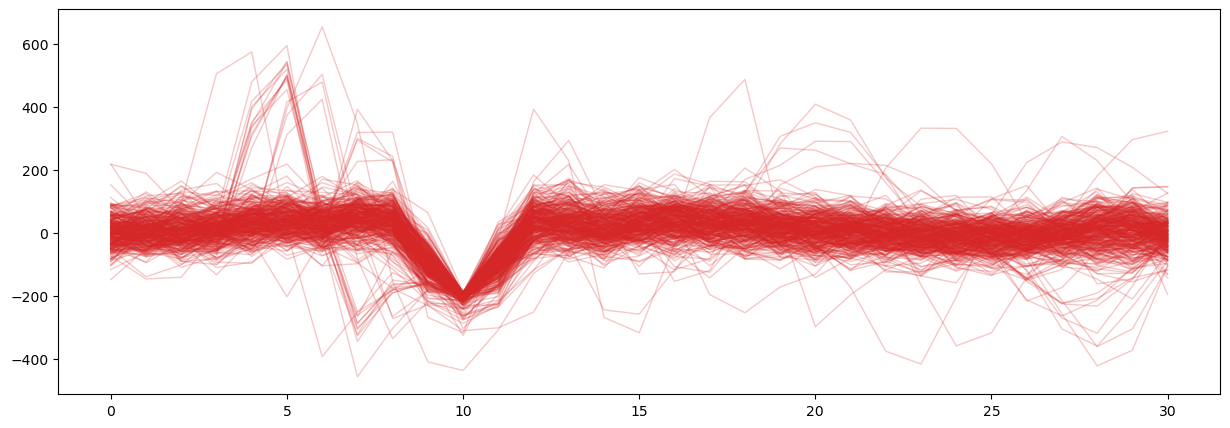

In [89]:
#plt.plot(experiment_pckl[e]['segments'][index_clus].T)
plt.figure(figsize = (15,5))
plt.plot(experiment_pckl[e]['segments'][index_clus].T, 
            color = colores[3], 
            linewidth=1, 
            alpha =0.25)
plt.plot()

In [110]:
# . . : : U M A P : : . .
reduced_spikes2 = spike_reducer(experiment_pckl['L6']['segments'][index_clus], v_neighbors = 30, random_state = 18)
spike_embedding2 = reduced_spikes2.embedding_
clusterer2 = hdbscan.HDBSCAN(min_cluster_size=20)
#clusterer = hdbscan.HDBSCAN(min_cluster_size=30)
clusterer2.fit(spike_embedding2)

HDBSCAN(min_cluster_size=20)

Número de spikes seleccionados: 0
Cluster encontrados: [-1  0  1]
Spikes detected: 350


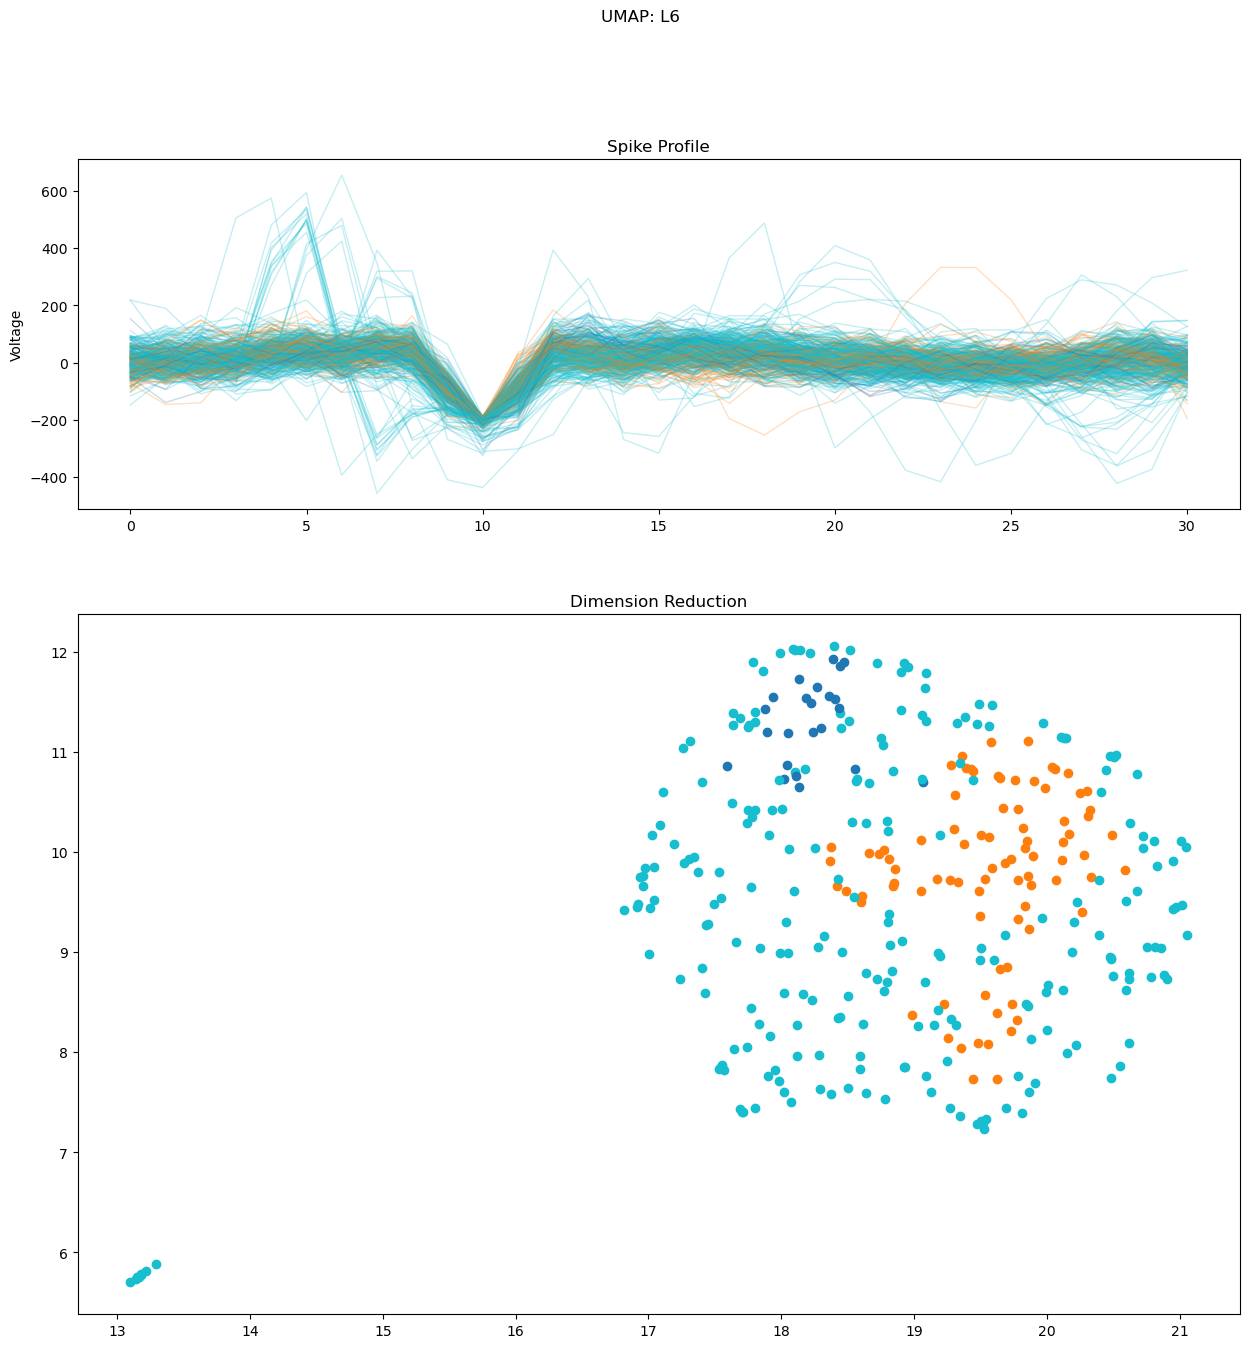

In [111]:
# mini GUI 
# gamma 0.85 0.9 para 
e = 'L6'
#mode = 'Select'
mode = 'All'
#cluster_list = [3]
#cluster_list = [0]

colores = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

fig, axs = plt.subplots(2, figsize=(15,15), gridspec_kw={'height_ratios': [1, 2]})
fig.suptitle("UMAP: {}".format(e))

axs[0].title.set_text('Spike Profile')
axs[0].set(ylabel='Voltage')

axs[1].title.set_text('Dimension Reduction')

conde_s = 0
list_tmp = []
list_ts = []
template = {}
clusters_seg = {}
#for i in range(0, len(cluster_list))

for j in range(0, len(clusterer2.labels_)):
    
    if mode == "All":
        axs[0].plot(experiment_pckl[e]['segments'][index_clus[j]].T, 
                    color = colores[clusterer2.labels_[j]], 
                    linewidth=1, 
                    alpha =0.25)
        axs[1].plot(spike_embedding2[j][0],
                    spike_embedding2[j][1], 
                    marker="o", 
                    color = colores[clusterer2.labels_[j]])
        
    elif mode == "Select":
        if experiment_pckl[e]['clusters'][j] in cluster_list:
            axs[0].plot(experiment_pckl[e]['segments'][j].T, 
                        color = colores[experiment_pckl[e]['clusters'][j]], 
                        linewidth=1, 
                        alpha =0.5)
            list_tmp.append(experiment_pckl[e]['segments'][j])
            #list_ts.append(experiment_pckl[segment][1][j])
            axs[1].plot(spike_embedding[j][0],spike_embedding[j][1], marker="o", color = colores[clusterer.labels_[j]])
                
                
                
            conde_s += 1
        else:
            #axs[0].plot(experiment_pckl[segment][0][j].T, color = "gray", linewidth=1, alpha =0.1)
            #axs[1].plot(spike_embedding[j][0],spike_embedding[j][1] , marker="o", color = "gray")
            pass
    

num_clusters2 = np.unique(clusterer2.labels_)

'''cluster_dict = {} 
for i in range(0, len(num_clusters)):
    cluster_dict[num_clusters[i]] = []
for i in range(0, len(experiment_pckl)):
    cluster_dict[clusterer.labels_[i]].append(i)'''



print("Número de spikes seleccionados: {}".format(conde_s))
print("Cluster encontrados: {}".format(num_clusters2))
print("Spikes detected: {}".format(len(experiment_pckl[e]['segments'][index_clus])))
